# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
temp = []
humidity = []
cloud = []
wind = []
clean_city = []
lat = []
lon =[]
country = []
date = []
for city in cities:
    response = requests.get(url + city).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        clean_city.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing... City: {city} City Number: {response['id']}")
    except:
        print(f"{city} is not available")
        
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Processing... City: punta arenas City Number: 3874787
Processing... City: hithadhoo City Number: 1282256
Processing... City: kungurtug City Number: 1501377
Processing... City: fort myers beach City Number: 4155996
Processing... City: tuktoyaktuk City Number: 6170031
taolanaro is not available
Processing... City: ossora City Number: 2122389
Processing... City: saint stephen City Number: 2638698
Processing... City: qaanaaq City Number: 3831208
Processing... City: cabo san lucas City Number: 3985710
Processing... City: aklavik City Number: 5882953
Processing... City: hobyo City Number: 57000
Processing... City: kruisfontein City Number: 986717
Processing... City: atuona City Number: 4020109
Processing... City: zunyi City Number: 1783621
tsihombe is not available
Processing... City: hermanus City Number: 3366880
Processing... City: ushuaia City Number: 3833367
Processing... City: liverpool City Number: 2644210
Processing... City: matane City Number: 6696260
Processing... City: margate City

Processing... City: victoria City Number: 1819729
Processing... City: richards bay City Number: 962367
Processing... City: rock sound City Number: 3571592
Processing... City: narsaq City Number: 3421719
Processing... City: kavaratti City Number: 1267390
Processing... City: kasongo-lunda City Number: 2315026
Processing... City: sola City Number: 2134814
Processing... City: virginia beach City Number: 4791259
Processing... City: barela City Number: 1277008
Processing... City: boende City Number: 218680
Processing... City: payyannur City Number: 1259994
mys shmidta is not available
Processing... City: panjab City Number: 1131162
Processing... City: isangel City Number: 2136825
Processing... City: cayenne City Number: 3382160
Processing... City: at-bashi City Number: 1528796
Processing... City: mao City Number: 2514301
Processing... City: grand gaube City Number: 934479
Processing... City: yizheng City Number: 1802013
Processing... City: salalah City Number: 286621
alotau is not available


Processing... City: ancud City Number: 3899695
Processing... City: jumla City Number: 1283285
Processing... City: bukama City Number: 217834
Processing... City: chirongui City Number: 1090415
Processing... City: bama City Number: 2347954
Processing... City: vostok City Number: 2013279
Processing... City: zlitan City Number: 2208485
Processing... City: faya City Number: 110690
Processing... City: peleduy City Number: 2018069
Processing... City: klaksvik City Number: 2618795
Processing... City: skibbereen City Number: 2961459
Processing... City: manzhouli City Number: 2035836
Processing... City: edd City Number: 338345
palabuhanratu is not available
Processing... City: linjiang City Number: 2036069
Processing... City: greenwood City Number: 4580575
Processing... City: shingu City Number: 1847947
Processing... City: cheremukhovo City Number: 569295
Processing... City: morros City Number: 3394372
Processing... City: mumford City Number: 2297810
Processing... City: neuquen City Number: 3843

Processing... City: ajdabiya City Number: 89113
Processing... City: buchanan City Number: 2278158
Processing... City: konstantinovka City Number: 2021799
Processing... City: pizarro City Number: 3672086
Processing... City: penzance City Number: 2640377
Processing... City: sanandaj City Number: 117574
Processing... City: gizo City Number: 2108857
Processing... City: alingsas City Number: 2726756
samalaeulu is not available
Processing... City: panguma City Number: 2404663
Processing... City: santa maria City Number: 3450083
Processing... City: pundaguitan City Number: 1698289
Processing... City: kontagora City Number: 2334008
Processing... City: beringovskiy City Number: 2126710
Processing... City: avera City Number: 4231997
Processing... City: ferrol City Number: 3123493
Processing... City: zhaozhou City Number: 2033147
Processing... City: dzaoudzi City Number: 921900
Processing... City: phan thiet City Number: 1571058
Processing... City: keroka City Number: 192869
Processing... City: b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({"City":clean_city,"Lat":lat,"Lon":lon,"Max Temp":temp,"Humidity":humidity,"Cloudiness":cloud,
                       "Wind Speed":wind,"Country":country,"Date":date})
city_df.to_csv('city_data.csv')
city_df.count()

City          580
Lat           580
Lon           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
city_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,33.80,59,61,8.05,CL,1595904358
1,hithadhoo,-0.60,73.08,82.87,78,100,14.05,MV,1595904370
2,kungurtug,50.60,97.52,69.33,38,99,2.10,RU,1595904678
3,fort myers beach,26.45,-81.95,81.00,74,1,10.29,US,1595904582
4,tuktoyaktuk,69.45,-133.04,59.00,77,90,13.87,CA,1595904375
...,...,...,...,...,...,...,...,...,...
575,mikuni,36.22,136.15,84.20,70,90,13.87,JP,1595904722
576,fort-shevchenko,44.51,50.26,79.61,37,0,17.47,KZ,1595904722
577,porto novo,6.50,2.60,75.20,94,20,11.41,BJ,1595904722
578,nkhotakota,-12.93,34.30,65.64,76,86,11.88,MW,1595904722


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.352586,21.456845,68.843983,72.227586,48.653448,7.863638,1.595905e+09
std,32.863675,90.880825,13.286398,18.453693,39.025773,5.230041,1.819187e+02
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.400000,1.595904e+09
25%,-6.837500,-58.867500,59.000000,61.750000,3.750000,4.000000,1.595904e+09
50%,23.300000,24.665000,70.000000,76.000000,49.000000,6.710000,1.595905e+09
75%,48.880000,103.187500,79.515000,87.000000,90.000000,11.410000,1.595905e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,28.860000,1.595905e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

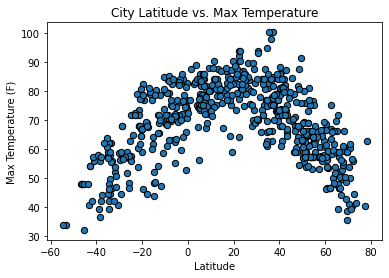

In [11]:
city_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.savefig("Images/LatVsTemp.png")
plt.show()

This code is showing the correlation between Latitude and Max Temperature for cities across the golbe. The shape of the graph confirm that temperature are higher in cities closer to the equator.

## Latitude vs. Humidity Plot

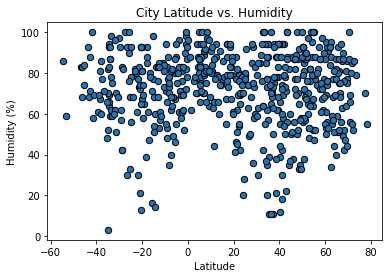

In [12]:
city_df.plot('Lat','Humidity', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.savefig("Images/LatVsHumid.png")
plt.show()

This code is showing the correlation between Latitude and Humidity for cities across the golbe. The shape of the graph shows there is no relationship between latitude and humidity.

## Latitude vs. Cloudiness Plot

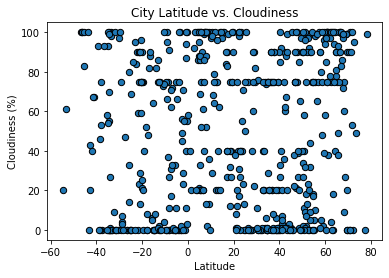

In [13]:
city_df.plot('Lat','Cloudiness', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.savefig("Images/LatVsCloud.png")
plt.show()

This code is showing the correlation between Latitude and Cloudiness for cities across the golbe. The shape of the graph shows there is no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

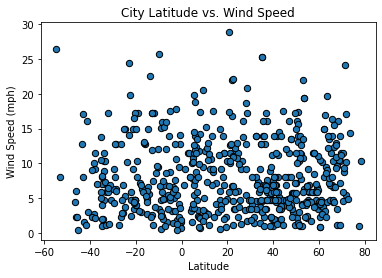

In [14]:
city_df.plot('Lat','Wind Speed', kind='scatter',edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")
plt.savefig("Images/LatVsWind.png")
plt.show()

This code is showing the correlation between Latitude and Wind Speed for cities across the golbe. The shape of the graph shows wind speed is generally 20 mph or less globally.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg_line(x_axis, y_axis,x,y):
    print(f"The r-squared is {(st.pearsonr(x_axis,y_axis)[0])**2}")
    m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
    m_fit = m_slope * x_axis + m_int
    plt.plot(x_axis,m_fit,"r-")
    line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north= city_df['Lat']>=0
north_df = city_df[north]

south= city_df['Lat']<0
south_df = city_df[south]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.502330008973692


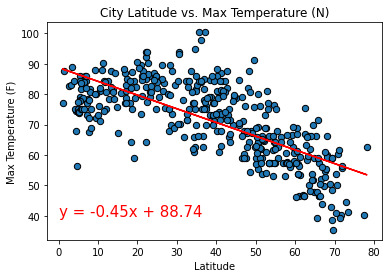

In [17]:
north_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (N)")
reg_line(north_df['Lat'],north_df['Max Temp'],0,40)
plt.savefig("Images/NorthLatVsTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5203453880845768


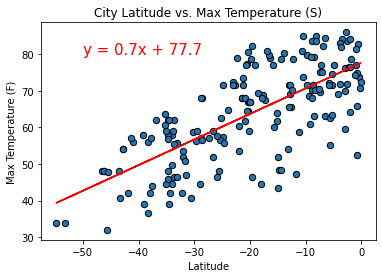

In [18]:
south_df.plot('Lat','Max Temp', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (S)")
reg_line(south_df['Lat'],south_df['Max Temp'],-50,80)
plt.savefig("Images/SouthLatVsTemp.png")
plt.show()


This code is showing the correlation between Latitude and Max Temperature for cities across the globe in each hemisphere. The shape of the graphs reaffirms that temperature are higher  closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.012089555110609237


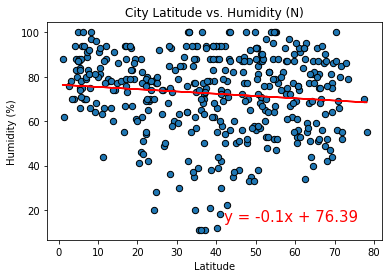

In [20]:
north_df.plot('Lat','Humidity', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (N)")
reg_line(north_df['Lat'],north_df['Humidity'],42,15)
plt.savefig("Images/NothLatVsHumid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.00021143356910349647


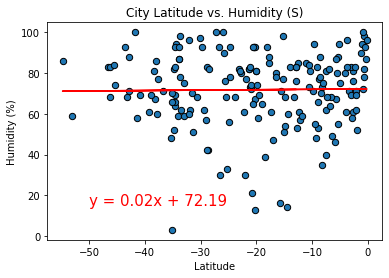

In [23]:
south_df.plot('Lat','Humidity', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (S)")
reg_line(south_df['Lat'],south_df['Humidity'],-50,15)
plt.savefig("Images/SouthLatVsHumid.png")
plt.show()

This code is showing the correlation between Latitude and Humidity for cities across the golbe in earch hemisphere. The shape of the graph reaffirms there is no relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0006253081196573577


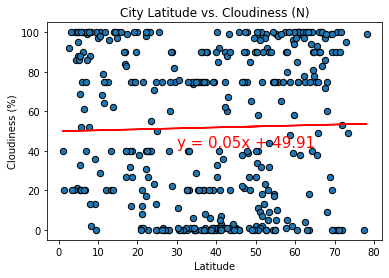

In [28]:
north_df.plot('Lat','Cloudiness', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (N)")
reg_line(north_df['Lat'],north_df['Cloudiness'],30,42)
plt.savefig("Images/NorthLatVsCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.007285607589340553


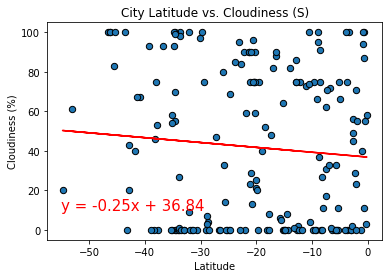

In [31]:
south_df.plot('Lat','Cloudiness', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (S)")
reg_line(south_df['Lat'],south_df['Cloudiness'],-55,10)
plt.savefig("Images/SouthLatVsCloud.png")
plt.show()

This code is showing the correlation between Latitude and Cloudiness for cities across the golbe in each hemisphere. The shape of the graph shows there is no relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0006685298931731442


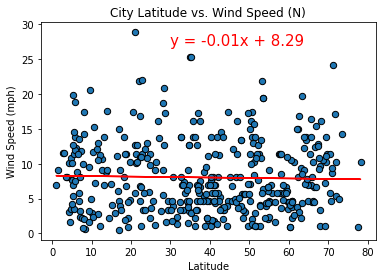

In [33]:
north_df.plot('Lat','Wind Speed', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (N)")
reg_line(north_df['Lat'],north_df['Wind Speed'],30,27)
plt.savefig("Images/NorthLatVsWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0010217359857688266


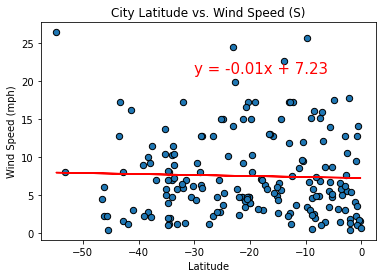

In [36]:
south_df.plot('Lat','Wind Speed', kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (S)")
reg_line(south_df['Lat'],south_df['Wind Speed'],-30,21)
plt.savefig("Images/SouthLatVsWind.png")
plt.show()

This code is showing the correlation between Latitude and Wind Speed for cities across the golbe. The shape of the graph shows there wind speed are mostly less than 20 mph in each hemisphere.

In [37]:
# Saving the weather data to a CSV
city_df.to_csv('weather_data.csv')
city_df.to_csv('../VacationPy/weather_data.csv')